![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Ensemble Project Module Part B
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Submitted by
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Shameer.Sutar


# Building a machine learning pipeline that will run autonomously with the csv file and return bestperforming model

In [88]:
# Importing Libreries
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.pipeline import Pipeline, make_pipeline
import warnings
import time
import scikitplot as skplt
from sklearn import metrics
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA
#!pip install catboost
from catboost import CatBoostClassifier
#!pip install xgboost
from xgboost import XGBClassifier
#!pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support,mean_absolute_error, accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

## <div style="background-color:#A3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Loading Data</div>

In [10]:
df = pd.read_csv('TelcomCustomer-Churn_2.csv')

**I will be using same but single dataset**

In [11]:
df.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## <div style="background-color:#A3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Shape and Size of Dataset</div>

In [12]:
print(f"Shape of Dataset : {df.shape}")
print(f"Size of Dataset : {df.size}")

Shape of Dataset : (7043, 12)
Size of Dataset : 84516


## <div style="background-color:#A3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Checking for Duplicate Values</div>

In [13]:
df[df.duplicated(keep = 'first')]

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


## <div style="background-color:#A3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Data Cleaning</div>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), object(11)
memory usage: 660.4+ KB


>> **TotalCharges should be float**

## <div style="background-color:#A3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Treating Missing Values</div>

In [19]:
empty_cols=['customerID', 'OnlineBackup', 'DeviceProtection','TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in empty_cols:
    df[i]=df[i].replace(" ",np.nan)

In [20]:
df.isnull().sum()

customerID           0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
df. isnull(). sum() * 100 / len(df)

customerID          0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

**Observed 11 missing values in TotalCharges.**

**Impute missing values with Mean.**


**Need to convert TotalObjects into float, because the values are continuous.**

In [22]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [23]:
df.mean()

MonthlyCharges      64.761692
TotalCharges      2283.300441
dtype: float64

In [24]:
df.fillna(df.mean(),inplace = True)

In [25]:
df.isnull().sum()

customerID          0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## <div style="background-color:#A3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">5 point Summary</div>


In [27]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceProtection,7043,3,No,3095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TechSupport,7043,3,No,3473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StreamingTV,7043,3,No,2810,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StreamingMovies,7043,3,No,2785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contract,7043,3,Month-to-month,3875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,7043,2,Yes,4171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaymentMethod,7043,4,Electronic check,2365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyCharges,7043.0,NaN,NaN,NaN,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [28]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['MonthlyCharges', 'TotalCharges'], object: ['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

## <div style="background-color:#A3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Convert to categorical data</div>


In [29]:
print('The data type of each attribute after conversion into categorical variables: \n')
for cols in df.columns: # Loop through all columns in the dataframe
    if df[cols].dtype == 'object':
        df[cols] = pd.Categorical(df[cols])
df.dtypes

The data type of each attribute after conversion into categorical variables: 



customerID          category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [33]:
df.drop(['customerID'], axis=1) # dropping customer id since it has no use

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [50]:
df['customerID'] = df['customerID'].astype('object')

In [52]:
# Categorical Features with extra 'No internet service' group will be replace with just 'No'

df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 'No')
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No')
df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No')

## <div style="background-color:#A3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Pie Chart for All categorical data and InSights</div>


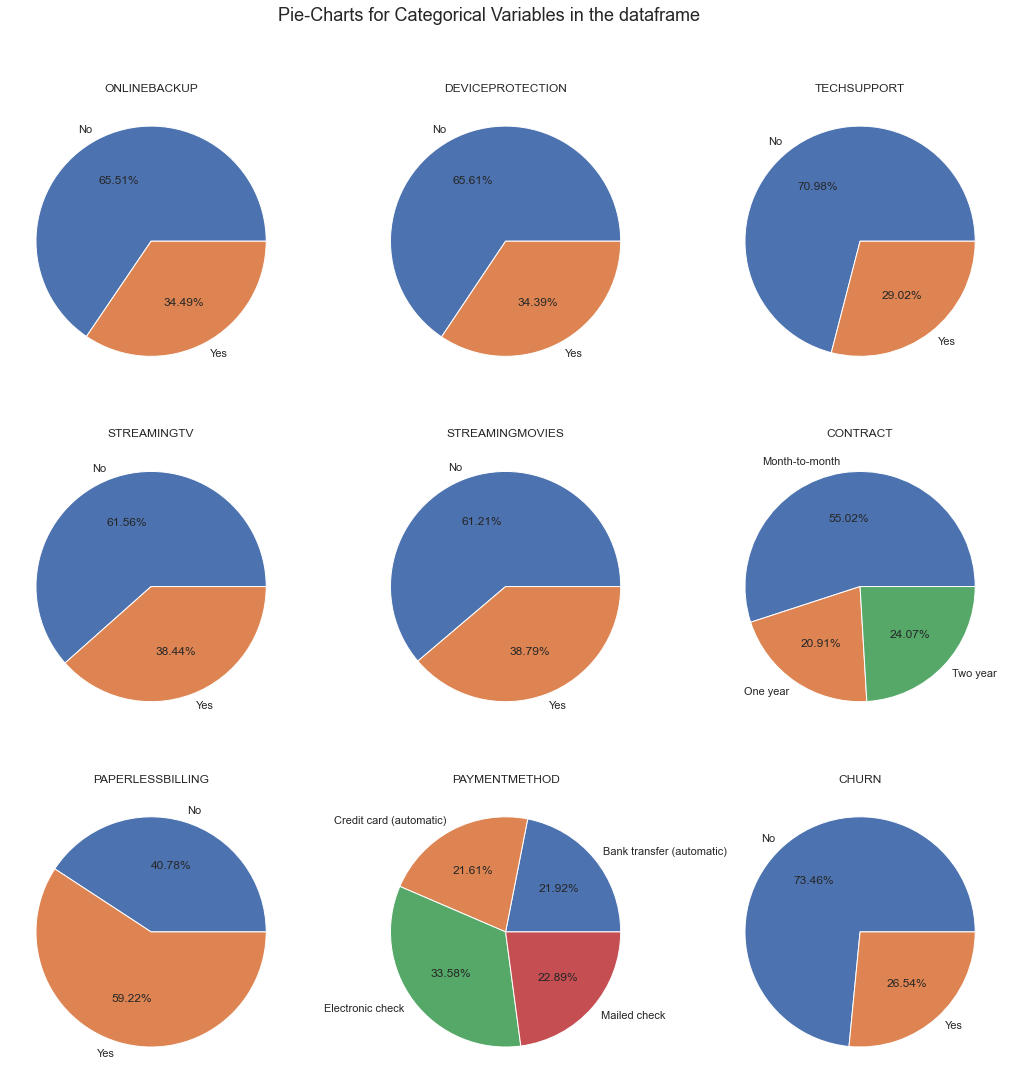

In [53]:
#Function to plot Pie-Charts for all categorical variables in the dataframe
def pie_charts_for_CategoricalVar(df_pie,m):
    '''Takes in a dataframe(df_pie) and plots pie charts for all categorical columns. m = number of columns required in grid'''
    
    #get all the column names in the dataframe
    a = []
    for i in df_pie:
        a.append(i)
    
    #isolate the categorical variable names from a to b
    b = []
    for i in a:
        if (df[i].dtype.name) == 'category':
            b.append(i)
        
    plt.figure(figsize=(18, 18))
    plt.subplots_adjust(hspace=0.2)
    plt.suptitle("Pie-Charts for Categorical Variables in the dataframe", fontsize=18, y=0.95)
    
    # number of columns, as inputted while calling the function
    ncols = m
    # calculate number of rows
    nrows = len(b) // ncols + (len(b) % ncols > 0)
    
    # loop through the length of 'b' and keep track of index
    for n, i in enumerate(b):
        # add a new subplot iteratively using nrows and ncols
        ax = plt.subplot(nrows, ncols, n + 1)

        # filter df and plot 'i' on the new subplot axis
        df.groupby(i).size().plot(kind='pie', autopct='%.2f%%',ax=ax)
        
        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
    plt.show()
#calling the function to plot pie-charts for categorical variable

pie_charts_for_CategoricalVar(df,3)   #dataframe, no. of cols in the grid

In [54]:
cat_features = ['OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
               'PaperlessBilling','PaymentMethod']

## <div style="background-color:#A3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Barplot of the Churn counts for each categorical feature</div>


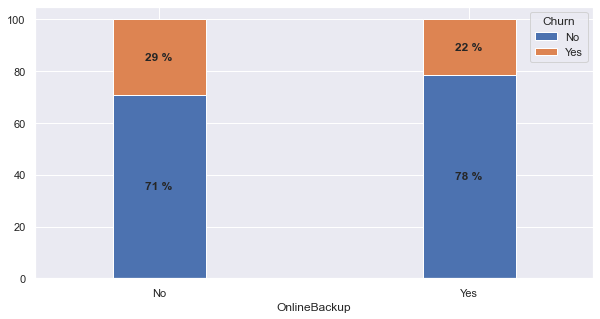

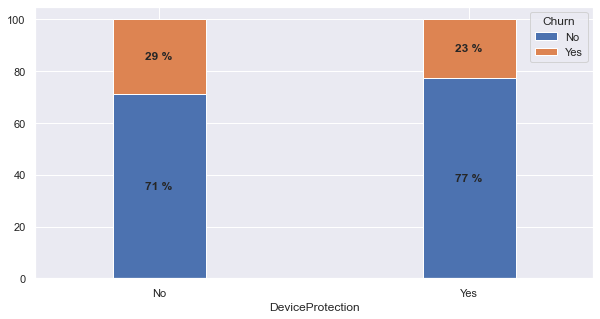

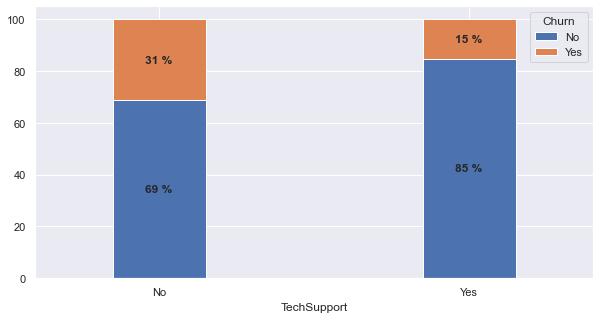

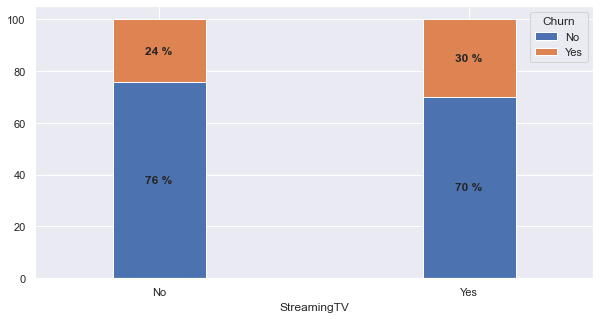

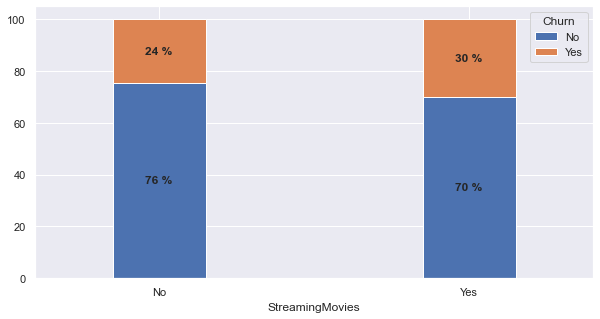

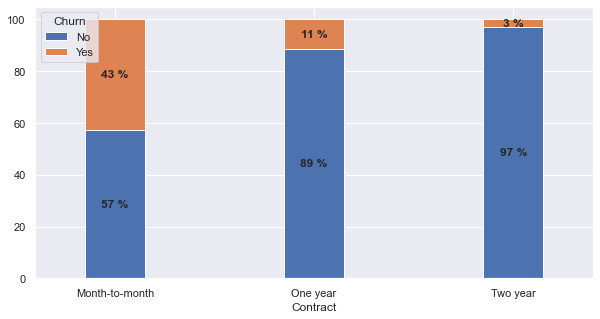

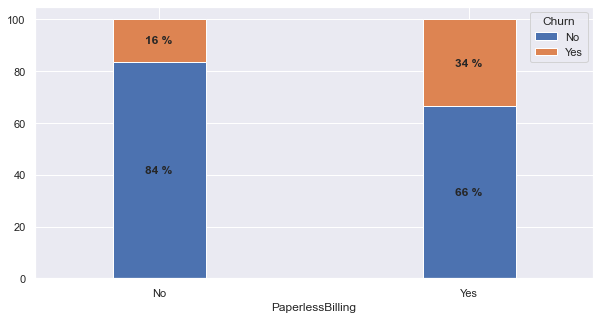

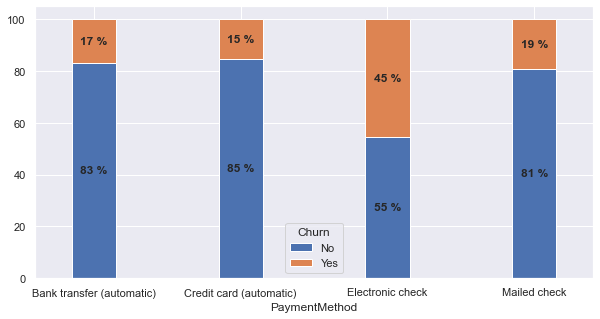

In [57]:

sns.set(font_scale=1)

for i in range(len(cat_features)):
    
    counts = df.groupby([cat_features[i],'Churn']).size().unstack()
    
    
    ax = (counts.T*100.0 / counts.T.sum()).T.plot(
        kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (10,5))

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center',
                weight='bold')
       

## <div style="background-color:#A3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Encoding all the appropriate Categorical features with the best suitable approach</div>

In [60]:
# converting the categorical features
dff = pd.get_dummies(df[cat_features])

# adding the numerical features
dff[['MonthlyCharges', 'TotalCharges']] = df[['MonthlyCharges', 'TotalCharges']]

dff['Churn'] = df['Churn']
dff['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
dff.head()

,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,TotalCharges,Churn
0,0,1,1,0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,29.85,29.85,0
1,1,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,1,56.95,1889.50,0
2,0,1,1,0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,53.85,108.15,1
3,1,0,0,1,0,1,1,0,1,0,...,0,1,0,1,0,0,0,42.30,1840.75,0
4,1,0,1,0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,70.70,151.65,1


## <div style="background-color:#A3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Target Predictor</div>


In [62]:
count_no_churn = (dff['Churn'] == 0).sum()
print("Number of customers who didn't churn:",count_no_churn)
count_yes_churn = (dff['Churn']==1).sum()
print("Number of customers who churnes:",count_yes_churn)

Number of customers who didn't churn: 5174
Number of customers who churnes: 1869


In [64]:
dff['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

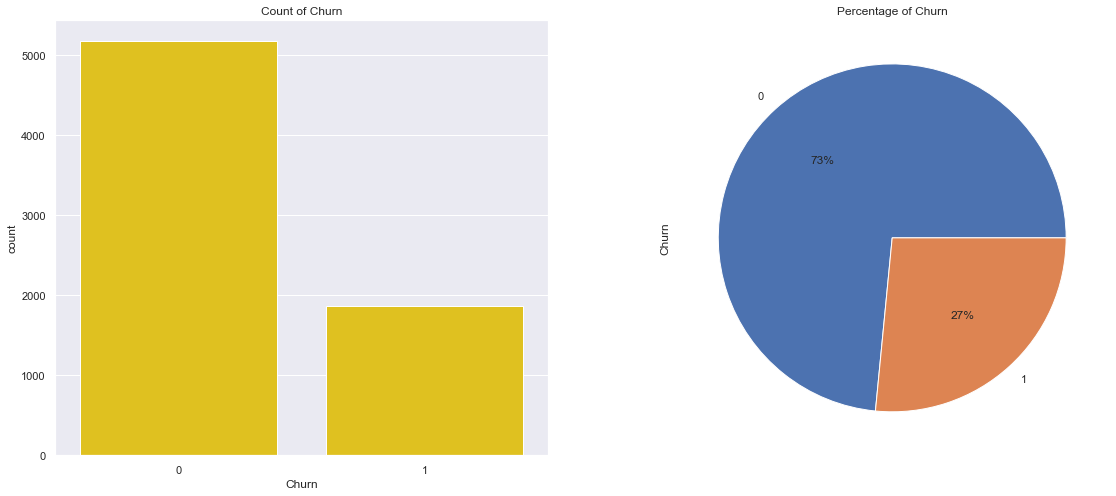

In [66]:
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.title('Count of Churn')
sns.countplot(dff['Churn'],color='Gold')

plt.subplot(1,3,2)
plt.title('Percentage of Churn')
dff['Churn'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

### <p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:40px;padding:10px 10px;font-weight:bold">Machine Learning Pipeline<p/>


In [68]:
X = dff.drop(['Churn'], axis=1)
y = dff['Churn']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (7043, 21)
Shape of y: (7043,)


In [70]:
dff['Churn'] = dff['Churn'].astype(int)

## <div style="background-color:#A3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Train and Test Split</div>

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# <div style="background-color:#A3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Creating ML Pipeline</div>

In [206]:
## Creating pipeline for each models
# pipeline steps will include
## 1.Data preprocessing using MinMax Scaler
## 2.Reducing Dimenstionality using PCA
## 3.Training respective model

In [185]:
LogisticRegressionPipeline=Pipeline([('myscalar',MinMaxScaler()),('mypca',PCA(n_components=3)),
                                    ('logistic_Classifier',LogisticRegression())])

In [186]:
DecisionTreePipeline=Pipeline([('myscalar',MinMaxScaler()),('mypca',PCA(n_components=3)),
                                    ('DecisionTree_Classifier',DecisionTreeClassifier())])

In [187]:
RandomForestPipeline=Pipeline([('myscalar',MinMaxScaler()),('mypca',PCA(n_components=3)),
                                    ('RandomForest_Classifier', RandomForestClassifier())])

In [188]:
AdaBoostPipeline=Pipeline([('myscalar',MinMaxScaler()),('mypca',PCA(n_components=3)),
                                    ('AdaBoost_Classifier', AdaBoostClassifier())])

In [189]:
BaggingPipeline=Pipeline([('myscalar',MinMaxScaler()),('mypca',PCA(n_components=3)),
                                    ('Bagging_Classifier', BaggingClassifier())])

In [190]:
XGBPipeline=Pipeline([('myscalar',MinMaxScaler()),('mypca',PCA(n_components=3)),
                                    ('XGB_Classifier', XGBClassifier())])

In [191]:
CatBoostPipeline=Pipeline([('myscalar',MinMaxScaler()),('mypca',PCA(n_components=3)),
                                    ('CatBoost_Classifier', CatBoostClassifier())])

In [192]:
LGBMPipeline=Pipeline([('myscalar',MinMaxScaler()),('mypca',PCA(n_components=3)),
                                    ('LGBM_Classifier', LGBMClassifier())])

## <div style="background-color:#A3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Model training and Validation</div>

In [196]:
# Definig a pipeline in list
mypipeline = [LogisticRegressionPipeline,DecisionTreePipeline,RandomForestPipeline,AdaBoostPipeline
             ,BaggingPipeline,XGBPipeline,CatBoostPipeline,LGBMPipeline]

In [197]:
#Defining variables for choosing best model
accuracy = 0.0
classifier = 0
pipeline = ""

In [198]:
#Creating a Dictionary od pipeline and training models
pipelineDict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'AdaBoost',
                4: 'Bagging', 5: 'XGB', 6: 'CatBoost', 7: 'LGBM', }

#fit the pipeline
for mypipe in mypipeline:
    mypipe.fit(X_train,y_train)

Learning rate set to 0.021554
0:	learn: 0.6820299	total: 5ms	remaining: 4.99s
1:	learn: 0.6701117	total: 9.55ms	remaining: 4.76s
2:	learn: 0.6605673	total: 14.1ms	remaining: 4.68s
3:	learn: 0.6510671	total: 19ms	remaining: 4.74s
4:	learn: 0.6411525	total: 23.9ms	remaining: 4.76s
5:	learn: 0.6328143	total: 28.7ms	remaining: 4.75s
6:	learn: 0.6248888	total: 33.3ms	remaining: 4.73s
7:	learn: 0.6171076	total: 37.9ms	remaining: 4.7s
8:	learn: 0.6093902	total: 42.5ms	remaining: 4.68s
9:	learn: 0.6025191	total: 47.4ms	remaining: 4.69s
10:	learn: 0.5954698	total: 51.7ms	remaining: 4.65s
11:	learn: 0.5897351	total: 56.1ms	remaining: 4.62s
12:	learn: 0.5836856	total: 60.7ms	remaining: 4.61s
13:	learn: 0.5767224	total: 66.1ms	remaining: 4.65s
14:	learn: 0.5710937	total: 70.4ms	remaining: 4.62s
15:	learn: 0.5650432	total: 75ms	remaining: 4.61s
16:	learn: 0.5600885	total: 79.7ms	remaining: 4.61s
17:	learn: 0.5552316	total: 84.5ms	remaining: 4.61s
18:	learn: 0.5509298	total: 89ms	remaining: 4.59s
19

188:	learn: 0.4393956	total: 902ms	remaining: 3.87s
189:	learn: 0.4392780	total: 907ms	remaining: 3.87s
190:	learn: 0.4392670	total: 911ms	remaining: 3.86s
191:	learn: 0.4392241	total: 916ms	remaining: 3.85s
192:	learn: 0.4391023	total: 921ms	remaining: 3.85s
193:	learn: 0.4390348	total: 928ms	remaining: 3.85s
194:	learn: 0.4389261	total: 936ms	remaining: 3.86s
195:	learn: 0.4388261	total: 941ms	remaining: 3.86s
196:	learn: 0.4387477	total: 948ms	remaining: 3.86s
197:	learn: 0.4386941	total: 954ms	remaining: 3.86s
198:	learn: 0.4386231	total: 959ms	remaining: 3.86s
199:	learn: 0.4386037	total: 964ms	remaining: 3.85s
200:	learn: 0.4385150	total: 968ms	remaining: 3.85s
201:	learn: 0.4384141	total: 973ms	remaining: 3.84s
202:	learn: 0.4383462	total: 977ms	remaining: 3.83s
203:	learn: 0.4382707	total: 982ms	remaining: 3.83s
204:	learn: 0.4382269	total: 986ms	remaining: 3.82s
205:	learn: 0.4380908	total: 991ms	remaining: 3.82s
206:	learn: 0.4380106	total: 995ms	remaining: 3.81s
207:	learn: 

373:	learn: 0.4258467	total: 1.79s	remaining: 3s
374:	learn: 0.4257492	total: 1.8s	remaining: 3s
375:	learn: 0.4257103	total: 1.8s	remaining: 2.99s
376:	learn: 0.4256820	total: 1.81s	remaining: 2.99s
377:	learn: 0.4256067	total: 1.81s	remaining: 2.99s
378:	learn: 0.4255347	total: 1.82s	remaining: 2.98s
379:	learn: 0.4254580	total: 1.82s	remaining: 2.98s
380:	learn: 0.4253898	total: 1.83s	remaining: 2.97s
381:	learn: 0.4253300	total: 1.83s	remaining: 2.97s
382:	learn: 0.4252537	total: 1.84s	remaining: 2.96s
383:	learn: 0.4251867	total: 1.84s	remaining: 2.96s
384:	learn: 0.4250946	total: 1.85s	remaining: 2.95s
385:	learn: 0.4249905	total: 1.85s	remaining: 2.95s
386:	learn: 0.4249200	total: 1.86s	remaining: 2.94s
387:	learn: 0.4248245	total: 1.86s	remaining: 2.94s
388:	learn: 0.4247618	total: 1.87s	remaining: 2.93s
389:	learn: 0.4246672	total: 1.87s	remaining: 2.93s
390:	learn: 0.4246133	total: 1.88s	remaining: 2.92s
391:	learn: 0.4245256	total: 1.88s	remaining: 2.92s
392:	learn: 0.424468

568:	learn: 0.4114108	total: 2.7s	remaining: 2.05s
569:	learn: 0.4113280	total: 2.71s	remaining: 2.04s
570:	learn: 0.4112904	total: 2.71s	remaining: 2.04s
571:	learn: 0.4112518	total: 2.73s	remaining: 2.04s
572:	learn: 0.4111507	total: 2.74s	remaining: 2.04s
573:	learn: 0.4110689	total: 2.74s	remaining: 2.04s
574:	learn: 0.4109613	total: 2.76s	remaining: 2.04s
575:	learn: 0.4108751	total: 2.76s	remaining: 2.03s
576:	learn: 0.4108094	total: 2.77s	remaining: 2.03s
577:	learn: 0.4107323	total: 2.77s	remaining: 2.02s
578:	learn: 0.4106331	total: 2.77s	remaining: 2.02s
579:	learn: 0.4105676	total: 2.78s	remaining: 2.01s
580:	learn: 0.4104974	total: 2.78s	remaining: 2.01s
581:	learn: 0.4103507	total: 2.79s	remaining: 2s
582:	learn: 0.4102652	total: 2.79s	remaining: 2s
583:	learn: 0.4102035	total: 2.8s	remaining: 1.99s
584:	learn: 0.4101555	total: 2.8s	remaining: 1.99s
585:	learn: 0.4100969	total: 2.81s	remaining: 1.98s
586:	learn: 0.4099881	total: 2.81s	remaining: 1.98s
587:	learn: 0.4099110

747:	learn: 0.3983876	total: 3.59s	remaining: 1.21s
748:	learn: 0.3983420	total: 3.6s	remaining: 1.21s
749:	learn: 0.3982876	total: 3.6s	remaining: 1.2s
750:	learn: 0.3982652	total: 3.61s	remaining: 1.2s
751:	learn: 0.3981721	total: 3.61s	remaining: 1.19s
752:	learn: 0.3980634	total: 3.62s	remaining: 1.19s
753:	learn: 0.3980031	total: 3.62s	remaining: 1.18s
754:	learn: 0.3979002	total: 3.63s	remaining: 1.18s
755:	learn: 0.3978523	total: 3.63s	remaining: 1.17s
756:	learn: 0.3978108	total: 3.64s	remaining: 1.17s
757:	learn: 0.3977328	total: 3.64s	remaining: 1.16s
758:	learn: 0.3976701	total: 3.65s	remaining: 1.16s
759:	learn: 0.3976274	total: 3.65s	remaining: 1.15s
760:	learn: 0.3975743	total: 3.66s	remaining: 1.15s
761:	learn: 0.3974953	total: 3.66s	remaining: 1.14s
762:	learn: 0.3974141	total: 3.67s	remaining: 1.14s
763:	learn: 0.3973624	total: 3.67s	remaining: 1.13s
764:	learn: 0.3973101	total: 3.68s	remaining: 1.13s
765:	learn: 0.3972837	total: 3.68s	remaining: 1.12s
766:	learn: 0.39

946:	learn: 0.3870463	total: 4.5s	remaining: 252ms
947:	learn: 0.3870130	total: 4.51s	remaining: 247ms
948:	learn: 0.3869733	total: 4.52s	remaining: 243ms
949:	learn: 0.3869250	total: 4.52s	remaining: 238ms
950:	learn: 0.3868868	total: 4.53s	remaining: 233ms
951:	learn: 0.3868106	total: 4.53s	remaining: 229ms
952:	learn: 0.3867737	total: 4.54s	remaining: 224ms
953:	learn: 0.3867450	total: 4.54s	remaining: 219ms
954:	learn: 0.3867179	total: 4.54s	remaining: 214ms
955:	learn: 0.3866468	total: 4.55s	remaining: 209ms
956:	learn: 0.3866041	total: 4.55s	remaining: 205ms
957:	learn: 0.3865317	total: 4.56s	remaining: 200ms
958:	learn: 0.3864798	total: 4.57s	remaining: 195ms
959:	learn: 0.3864257	total: 4.57s	remaining: 190ms
960:	learn: 0.3863709	total: 4.58s	remaining: 186ms
961:	learn: 0.3863048	total: 4.58s	remaining: 181ms
962:	learn: 0.3862775	total: 4.59s	remaining: 176ms
963:	learn: 0.3862456	total: 4.59s	remaining: 171ms
964:	learn: 0.3861918	total: 4.6s	remaining: 167ms
965:	learn: 0.

In [199]:
#getting test accurary for all models
for i,model in enumerate(mypipeline):
    print("{} Test Accuracy: {}".format(pipelineDict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.7806955287437899
Decision Tree Test Accuracy: 0.7381121362668559
Random Forest Test Accuracy: 0.7771469127040455
AdaBoost Test Accuracy: 0.7835344215755855
Bagging Test Accuracy: 0.7636621717530163
XGB Test Accuracy: 0.7785663591199432
CatBoost Test Accuracy: 0.7792760823278921
LGBM Test Accuracy: 0.7828246983676366


In [200]:
#Chossing best model for given data
for i,model in enumerate(mypipeline):
    if model.score(X_test,y_test)>accuracy:
        accuracy=model.score(X_test,y_test)
        pipeline=model
        classifier=i
print('Classifier with best Accuracy:{}'.format(pipelineDict[classifier]))

Classifier with best Accuracy:AdaBoost


In [203]:
# Import pickle Package

import pickle

In [204]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle__AdaBoost_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(AdaBoostClassifier, file)

In [205]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickle_AdaBoost_Model = pickle.load(file)
    
Pickle_AdaBoost_Model

sklearn.ensemble._weight_boosting.AdaBoostClassifier

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)